<a href="https://colab.research.google.com/github/SonramSirirat/everything-starts-with-data/blob/main/Workshop_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop - 5 extend as homework

*   Use the previous preprocessed adult data set, and apply the KNN learning algorithm through scklearn
*   You are required to program in Python submit your ipybn file to the google class room with the following results.
*   Report Accuracy rate, Confusion matrix, Plot train vs test dataset, Plot of Cross validation.
*   What is the optimal k?
*   Write 1 paragraph discuss the result of your model.


#Data Exploration

**Import Data**

In [117]:
import pandas as pd
url = "https://raw.githubusercontent.com/SonramSirirat/everything-starts-with-data/main/Workshop_5/adult_pre.csv?raw=True"
df = pd.read_csv(url)

**Adult Table**

In [118]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex.Female,sex.Male,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,1,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,1,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,1,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,0,40,United-States,<=50K


**Features / Attribute**

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28214 entries, 0 to 28213
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             28214 non-null  int64 
 1   workclass       28214 non-null  object
 2   fnlwgt          28214 non-null  int64 
 3   education       28214 non-null  object
 4   education.num   28214 non-null  int64 
 5   marital.status  28214 non-null  object
 6   occupation      28207 non-null  object
 7   relationship    28214 non-null  object
 8   race            28214 non-null  object
 9   sex.Female      28214 non-null  int64 
 10  sex.Male        28214 non-null  int64 
 11  capital.gain    28214 non-null  int64 
 12  capital.loss    28214 non-null  int64 
 13  hours.per.week  28214 non-null  int64 
 14  native.country  28214 non-null  object
 15  income          28214 non-null  object
dtypes: int64(8), object(8)
memory usage: 3.4+ MB


# Create Model, Tuning Model and Report

**Target Class**

In [120]:
target = df[["income"]]
target.value_counts()

income
 <=50K    22837
 >50K      5377
dtype: int64

**Selection Feature**

In [121]:
X = df[["age", "fnlwgt", "education.num", "sex.Female", "sex.Male", "capital.gain", "capital.loss", "hours.per.week"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28214 entries, 0 to 28213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             28214 non-null  int64
 1   fnlwgt          28214 non-null  int64
 2   education.num   28214 non-null  int64
 3   sex.Female      28214 non-null  int64
 4   sex.Male        28214 non-null  int64
 5   capital.gain    28214 non-null  int64
 6   capital.loss    28214 non-null  int64
 7   hours.per.week  28214 non-null  int64
dtypes: int64(8)
memory usage: 1.7 MB


**Train Test Split**

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target,
                                                    test_size = 0.2,
                                                    random_state = 7,
                                                    stratify = target)
print('Train Shape X: {} Y: {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y: {}'.format(X_test.shape,y_test.shape))

Train Shape X: (22571, 8) Y: (22571, 1)
Test Shape X: (5643, 8) Y: (5643, 1)


**Create KNN Model**

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train.values.ravel())
print(knn)

answer = knn.predict(X_test)
print('Answer:', answer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Answer: [' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


**Create Classification Report**

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

       <=50K       0.84      0.83      0.84      4568
        >50K       0.31      0.32      0.31      1075

    accuracy                           0.74      5643
   macro avg       0.57      0.58      0.58      5643
weighted avg       0.74      0.74      0.74      5643



**Scale Tranformation**

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # scale

**Train Test Split**

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, target,
                                                    test_size = 0.2,
                                                    random_state = 7,
                                                    stratify = target)
print('Train Shape X: {} Y: {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y: {}'.format(X_test.shape,y_test.shape))

Train Shape X: (22571, 8) Y: (22571, 1)
Test Shape X: (5643, 8) Y: (5643, 1)


**Create KNN Model**

In [127]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train.values.ravel())
print(knn)

answer = knn.predict(X_test)
print('Answer:', answer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Answer: [' >50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


**Create Classification Report**

In [128]:
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

       <=50K       0.86      0.86      0.86      4568
        >50K       0.41      0.42      0.41      1075

    accuracy                           0.77      5643
   macro avg       0.64      0.64      0.64      5643
weighted avg       0.78      0.77      0.78      5643



**Tune Model**

In [129]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 50)}
knn_best = GridSearchCV(knn, parameters, cv = 5)
knn_best.fit(X_train, y_train.values.ravel())
knn_best.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

**Create Classification Report(After tuning model)**

In [130]:
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      4568
        >50K       0.62      0.35      0.45      1075

    accuracy                           0.84      5643
   macro avg       0.74      0.65      0.67      5643
weighted avg       0.82      0.84      0.82      5643



# Evaluate Model

**Classification Report**

In [134]:
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      4568
        >50K       0.62      0.35      0.45      1075

    accuracy                           0.84      5643
   macro avg       0.74      0.65      0.67      5643
weighted avg       0.82      0.84      0.82      5643



**Run Classifier**

In [148]:
from sklearn import svm, datasets
classifier = svm.SVC(kernel='linear')
y_pred = classifier.fit(X_train, y_train.values.ravel()).predict(X_test)
print(y_pred)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


**Compute confusion matrix**

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4568    0]
 [1075    0]]


**Confusion Matrix**

[Readmore](https://medium.com/@cheng3374/%E0%B8%A7%E0%B8%B1%E0%B8%94%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%AA%E0%B8%B4%E0%B8%97%E0%B8%98%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%9E-model-%E0%B8%88%E0%B8%B2%E0%B8%81-confusion-matrix-69d391bcd48)

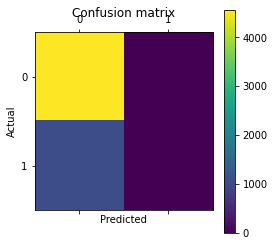

In [151]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Cross Validation**

In [188]:
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(knn, 
                        X_train, 
                        y_train.values.ravel(), 
                        cv = 45, 
                        scoring = 'accuracy')
print(score_train)

[0.76494024 0.80677291 0.76494024 0.77689243 0.76494024 0.79083665
 0.77888446 0.74900398 0.75099602 0.75896414 0.76494024 0.74501992
 0.7749004  0.78286853 0.77290837 0.78286853 0.79681275 0.74900398
 0.74103586 0.75896414 0.78087649 0.76095618 0.7749004  0.78286853
 0.79681275 0.75298805 0.80439122 0.74850299 0.78243513 0.76846307
 0.77045908 0.78642715 0.74251497 0.78842315 0.7744511  0.75848303
 0.76047904 0.75848303 0.80239521 0.8003992  0.7744511  0.79241517
 0.7744511  0.75648703 0.76247505]


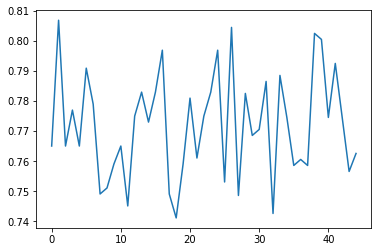

In [189]:
import matplotlib.pyplot as plt
plt.plot(score_train)

In [190]:
from sklearn.model_selection import cross_val_score
score_test = cross_val_score(knn, 
                        X_test, 
                        y_test.values.ravel(), 
                        cv = 45, 
                        scoring = 'accuracy')
print(score_test)

[0.76984127 0.79365079 0.71428571 0.82539683 0.73809524 0.75396825
 0.76190476 0.75396825 0.8015873  0.76984127 0.76190476 0.70634921
 0.78571429 0.75396825 0.77777778 0.76190476 0.73809524 0.81746032
 0.784      0.728      0.76       0.728      0.784      0.792
 0.784      0.736      0.76       0.752      0.768      0.816
 0.72       0.76       0.824      0.8        0.736      0.808
 0.816      0.752      0.768      0.808      0.76       0.768
 0.768      0.712      0.728     ]


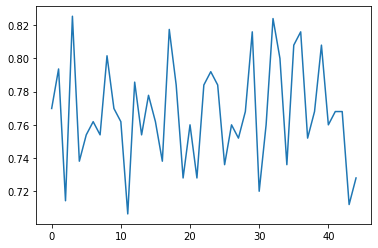

In [191]:
plt.plot(score_test)